# Fashion Class Classification
### 70, 000 28x28 gray-scale images [60, 000] for training purposes and [10, 000] for testing

## 1. Importing Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fashion_train_df = pd.read_csv('input/fashion-mnist_train.csv', sep= ',')

In [3]:
fashion_test_df = pd.read_csv('input/fashion-mnist_test.csv', sep= ',')

## 2. Visualization of the Data

In [4]:
fashion_train_df.head()
fashion_train_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59999,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
fashion_train_df.shape
fashion_test_df.shape

(10000, 785)

In [6]:
training = np.array(fashion_train_df, dtype = 'float32')

In [7]:
testing = np.array(fashion_test_df, dtype = 'float32')

0.0

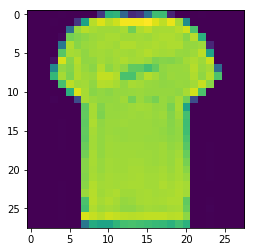

In [8]:
plt.imshow(training[10,1:].reshape(28,28))
label = training[10,0]
label

In [9]:
# Remember the 10 clases
# 0 => T-shirt/Top
# 1 => Trouser
# 2 => Pullover
# 3 => Dress
# 4 => Coat
# 5 => Sandal
# 6 => Shirt
# 7 => Sneaker
# 8 => Bag
# 9 => Ankle boot

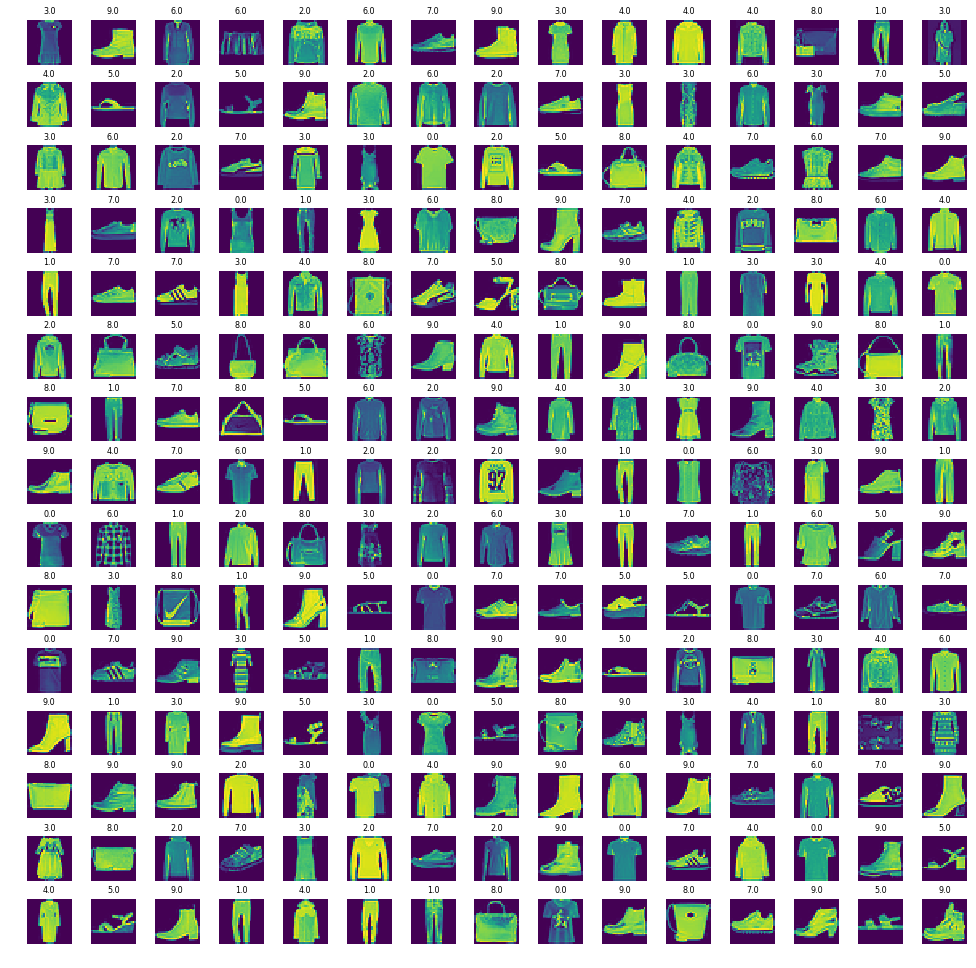

In [10]:
import random
#View more images in a grid format
W_grid = 15
L_grid = 15

fig, axes = plt.subplots(L_grid,W_grid,figsize = (17,17))
axes = axes.ravel() #flat 15x15 matrix into a 225 array

n_training = len(training) #lenght of the training dataset

for i in np.arange(0, W_grid * L_grid):
    index = np.random.randint(0, n_training)
    axes[i].imshow(training[index,1:].reshape((28,28)))
    axes[i].set_title(training[index,0], fontsize = 8)
    axes[i].axis('off')
    
plt.subplots_adjust(hspace=0.4)

## 3. Training The Model

In [11]:
# training set is everything in training except the first column
# X_train is normalized too
X_train = training[:,1:]/255
# y_train will be only the first column of each row (correct classification)
y_train = training[:,0]

In [12]:
# 10 000 images for testing (data + classification)
X_test = testing[:,1:]/255
y_test = testing[:,0]

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size = 0.2, random_state = 12345)

In [15]:
X_train = X_train.reshape(X_train.shape[0], *(28,28,1))
X_test = X_test.reshape(X_test.shape[0], *(28,28,1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28,28,1))

In [16]:
X_train.shape

(48000, 28, 28, 1)

In [17]:
X_test.shape

(10000, 28, 28, 1)

In [18]:
X_validate.shape

(12000, 28, 28, 1)

In [19]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

Using TensorFlow backend.


In [20]:
cnn_model = Sequential()

In [21]:
cnn_model.add(Conv2D(32, 3, 3, input_shape = (28,28,1), activation = 'relu'))

/Users/jonathanfigueroa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1..., activation="relu")`
  """Entry point for launching an IPython kernel.


In [22]:
cnn_model.add(MaxPool2D(pool_size = (2,2)))

In [23]:
cnn_model.add(Flatten())

In [24]:
cnn_model.add(Dense(output_dim = 32, activation = 'relu'))

/Users/jonathanfigueroa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=32)`
  """Entry point for launching an IPython kernel.


In [25]:
cnn_model.add(Dense(output_dim = 10, activation = 'sigmoid'))

/Users/jonathanfigueroa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=10)`
  """Entry point for launching an IPython kernel.


In [26]:
cnn_model.compile(loss = 'sparse_categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

In [27]:
epochs = 50

In [28]:
cnn_model.fit(X_train, y_train, batch_size=512, epochs = epochs, verbose=1, validation_data=(X_validate,y_validate))

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 11s 220us/step - loss: 0.9594 - acc: 0.6862 - val_loss: 0.5140 - val_acc: 0.8163
Epoch 2/50
48000/48000 [==============================] - 12s 241us/step - loss: 0.4728 - acc: 0.8347 - val_loss: 0.4400 - val_acc: 0.8468
Epoch 3/50
48000/48000 [==============================] - 11s 228us/step - loss: 0.4227 - acc: 0.8527 - val_loss: 0.4104 - val_acc: 0.8548
Epoch 4/50
48000/48000 [==============================] - 11s 235us/step - loss: 0.3929 - acc: 0.8635 - val_loss: 0.3837 - val_acc: 0.8682
Epoch 5/50
48000/48000 [==============================] - 12s 244us/step - loss: 0.3723 - acc: 0.8710 - val_loss: 0.3770 - val_acc: 0.8701
Epoch 6/50
48000/48000 [==============================] - 12s 246us/step - loss: 0.3555 - acc: 0.8765 - val_loss: 0.3475 - val_acc: 0.8785
Epoch 7/50
48000/48000 [==============================] - 11s 228us/step - loss: 0.3421 - acc: 0.8808 - val_loss: 0.

## 4. Evaluating the model

In [29]:
evaluation = cnn_model.evaluate(X_test, y_test)
print('Test Accuracy : {:.3f}'.format(evaluation[1]))

10000/10000 [==============================] - 1s 81us/step
Test Accuracy : 0.913


In [31]:
predicted_classes = cnn_model.predict_classes(X_test)

In [33]:
predicted_classes

array([0, 1, 6, ..., 8, 8, 1])

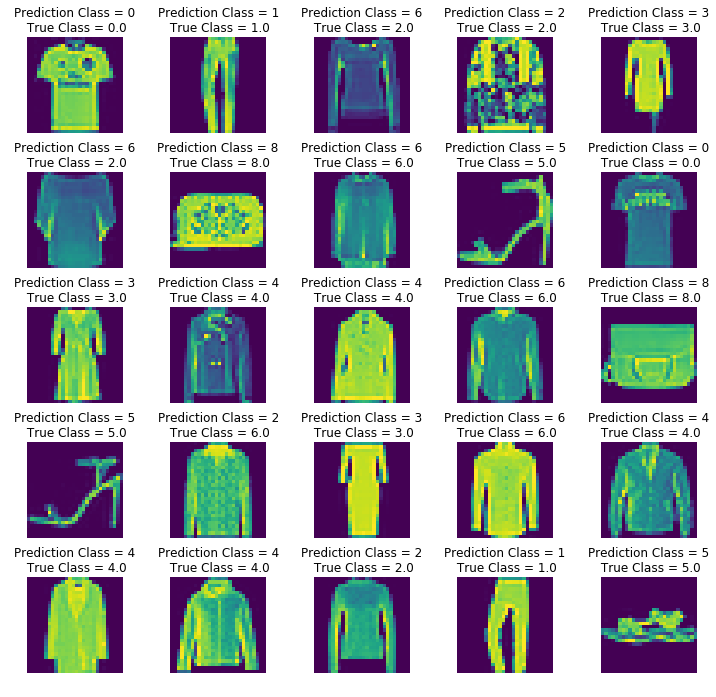

In [37]:
L = 5
W = 5
fig, axes = plt.subplots(L,W, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title(f"Prediction Class = {predicted_classes[i]}\n True Class = {y_test[i]}")
    axes[i].axis('off')
    
plt.subplots_adjust(wspace = 0.5)

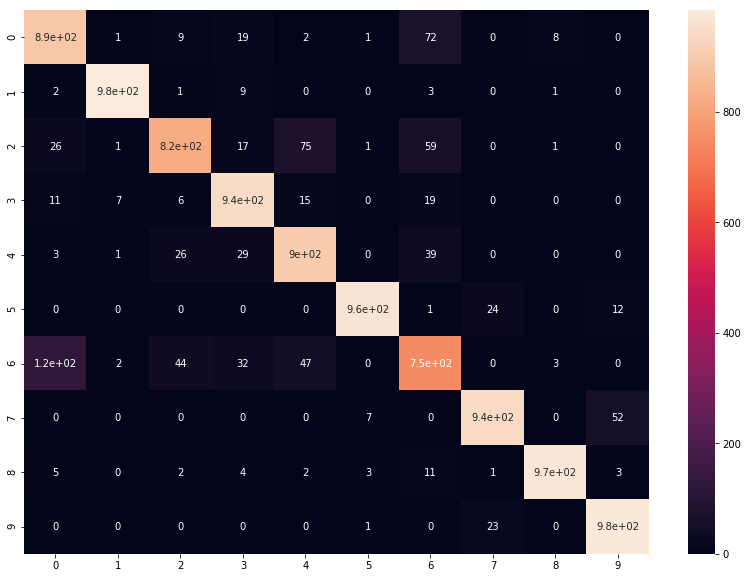

In [39]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize=(14,10))
sns.heatmap(cm,annot=True)

In [53]:
from sklearn.metrics import classification_report
num_classes = 10
target_names = [f"Class {i}" for i in range(num_classes)]
actual_names = ['T-shirt Top 0','Trouser 1','Pullover 2','Dress 3','Coat 4','Sandal 5', 'Shirt 6','Sneaker 7','Bag 8','Ankle boot 9']
print(classification_report(y_test,predicted_classes,target_names=actual_names))

               precision    recall  f1-score   support

T-shirt Top 0       0.84      0.89      0.86      1000
    Trouser 1       0.99      0.98      0.99      1000
   Pullover 2       0.90      0.82      0.86      1000
      Dress 3       0.90      0.94      0.92      1000
       Coat 4       0.86      0.90      0.88      1000
     Sandal 5       0.99      0.96      0.97      1000
      Shirt 6       0.79      0.75      0.77      1000
    Sneaker 7       0.95      0.94      0.95      1000
        Bag 8       0.99      0.97      0.98      1000
 Ankle boot 9       0.94      0.98      0.96      1000

  avg / total       0.91      0.91      0.91     10000



In [56]:
from joblib import dump, load

In [58]:
dump(cnn_model,'model')

['model']

In [64]:
from os.path import isfile
if isfile('model'):
    cnn_model = load('model')

## 5. Improving the model

In [84]:
cnn_model_with_dropout = Sequential()
cnn_model_with_dropout.add(Conv2D(64, 3, 3, input_shape = (28,28,1), activation = 'relu'))
#cnn_model_with_dropout.add(Dropout(0.5))
cnn_model_with_dropout.add(MaxPool2D(pool_size = (2,2)))
#cnn_model_with_dropout.add(Dropout(0.5))
cnn_model_with_dropout.add(Flatten())
cnn_model_with_dropout.add(Dropout(0.5))
cnn_model_with_dropout.add(Dense(output_dim = 64, activation = 'relu'))
cnn_model_with_dropout.add(Dropout(0.5))
cnn_model_with_dropout.add(Dense(output_dim = 10, activation = 'sigmoid'))
cnn_model_with_dropout.compile(loss = 'sparse_categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])
epochs = 50
history_dropout = cnn_model_with_dropout.fit(X_train, y_train, batch_size=512, epochs = epochs, verbose=1, validation_data=(X_validate,y_validate))

/Users/jonathanfigueroa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), input_shape=(28, 28, 1..., activation="relu")`
  
/Users/jonathanfigueroa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=64)`
  
/Users/jonathanfigueroa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=10)`
  # Remove the CWD from sys.path while we load stuff.


Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 20s 418us/step - loss: 1.1987 - acc: 0.5827 - val_loss: 0.5871 - val_acc: 0.7722
Epoch 2/50
48000/48000 [==============================] - 19s 405us/step - loss: 0.7055 - acc: 0.7530 - val_loss: 0.4616 - val_acc: 0.8299
Epoch 3/50
48000/48000 [==============================] - 20s 408us/step - loss: 0.5701 - acc: 0.8004 - val_loss: 0.3975 - val_acc: 0.8489
Epoch 4/50
48000/48000 [==============================] - 19s 403us/step - loss: 0.5094 - acc: 0.8244 - val_loss: 0.3718 - val_acc: 0.8649
Epoch 5/50
48000/48000 [==============================] - 20s 407us/step - loss: 0.4653 - acc: 0.8404 - val_loss: 0.3415 - val_acc: 0.8763
Epoch 6/50
48000/48000 [==============================] - 20s 408us/step - loss: 0.4393 - acc: 0.8478 - val_loss: 0.3225 - val_acc: 0.8846
Epoch 7/50
48000/48000 [==============================] - 20s 407us/step - loss: 0.4207 - acc: 0.8521 - val_loss: 0.

In [85]:
predicted_classes_with_dropout = cnn_model_with_dropout.predict_classes(X_test)

In [86]:
print(classification_report(y_test,predicted_classes_with_dropout,target_names=actual_names))

               precision    recall  f1-score   support

T-shirt Top 0       0.83      0.90      0.86      1000
    Trouser 1       0.99      0.98      0.98      1000
   Pullover 2       0.90      0.87      0.88      1000
      Dress 3       0.92      0.94      0.93      1000
       Coat 4       0.87      0.91      0.89      1000
     Sandal 5       0.99      0.97      0.98      1000
      Shirt 6       0.80      0.71      0.75      1000
    Sneaker 7       0.96      0.95      0.96      1000
        Bag 8       0.98      0.98      0.98      1000
 Ankle boot 9       0.95      0.98      0.96      1000

  avg / total       0.92      0.92      0.92     10000



In [87]:
evaluation = cnn_model_with_dropout.evaluate(X_test, y_test)
print('Test Accuracy : {:.3f}'.format(evaluation[1]))

10000/10000 [==============================] - 1s 124us/step
Test Accuracy : 0.919


In [88]:
dump(cnn_model_with_dropout,'model_with_dropout')

['model_with_dropout']

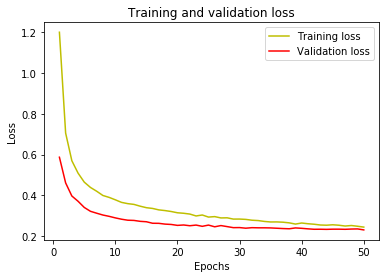

In [89]:
loss = history_dropout.history['loss']
val_loss = history_dropout.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

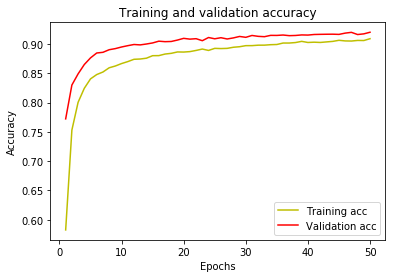

In [90]:
acc = history_dropout.history['acc']
val_acc = history_dropout.history['val_acc']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()